#  Bank Customer Churn Prediction

In [173]:
import pandas as pd

In [81]:
import numpy as np

In [82]:
data = pd.read_csv('Churn_Modelling.csv')

# Data Cleaning

1. Display Top 5 rows of Dataset

In [98]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
data.shape

(10000, 11)

In [100]:
print("Number of Rows", data.shape[0])

Number of Rows 10000


In [101]:
print("Number of Columns", data.shape[1])

Number of Columns 11


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Checking the missing values

In [103]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [169]:
 data.isnull()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [170]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [171]:
data.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [107]:
  data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [108]:
# Dropping RowNumber, CustomerId and Surname as its irrelevant to build machine learning model with this attribute

In [109]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

KeyError: "['RowNumber', 'CustomerId', 'Surname'] not found in axis"

# Exploratory Data Analysis

In [110]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [112]:
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [113]:
print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [114]:
data = pd.get_dummies(data,drop_first=True)

In [115]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [116]:
data['Exited']. value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

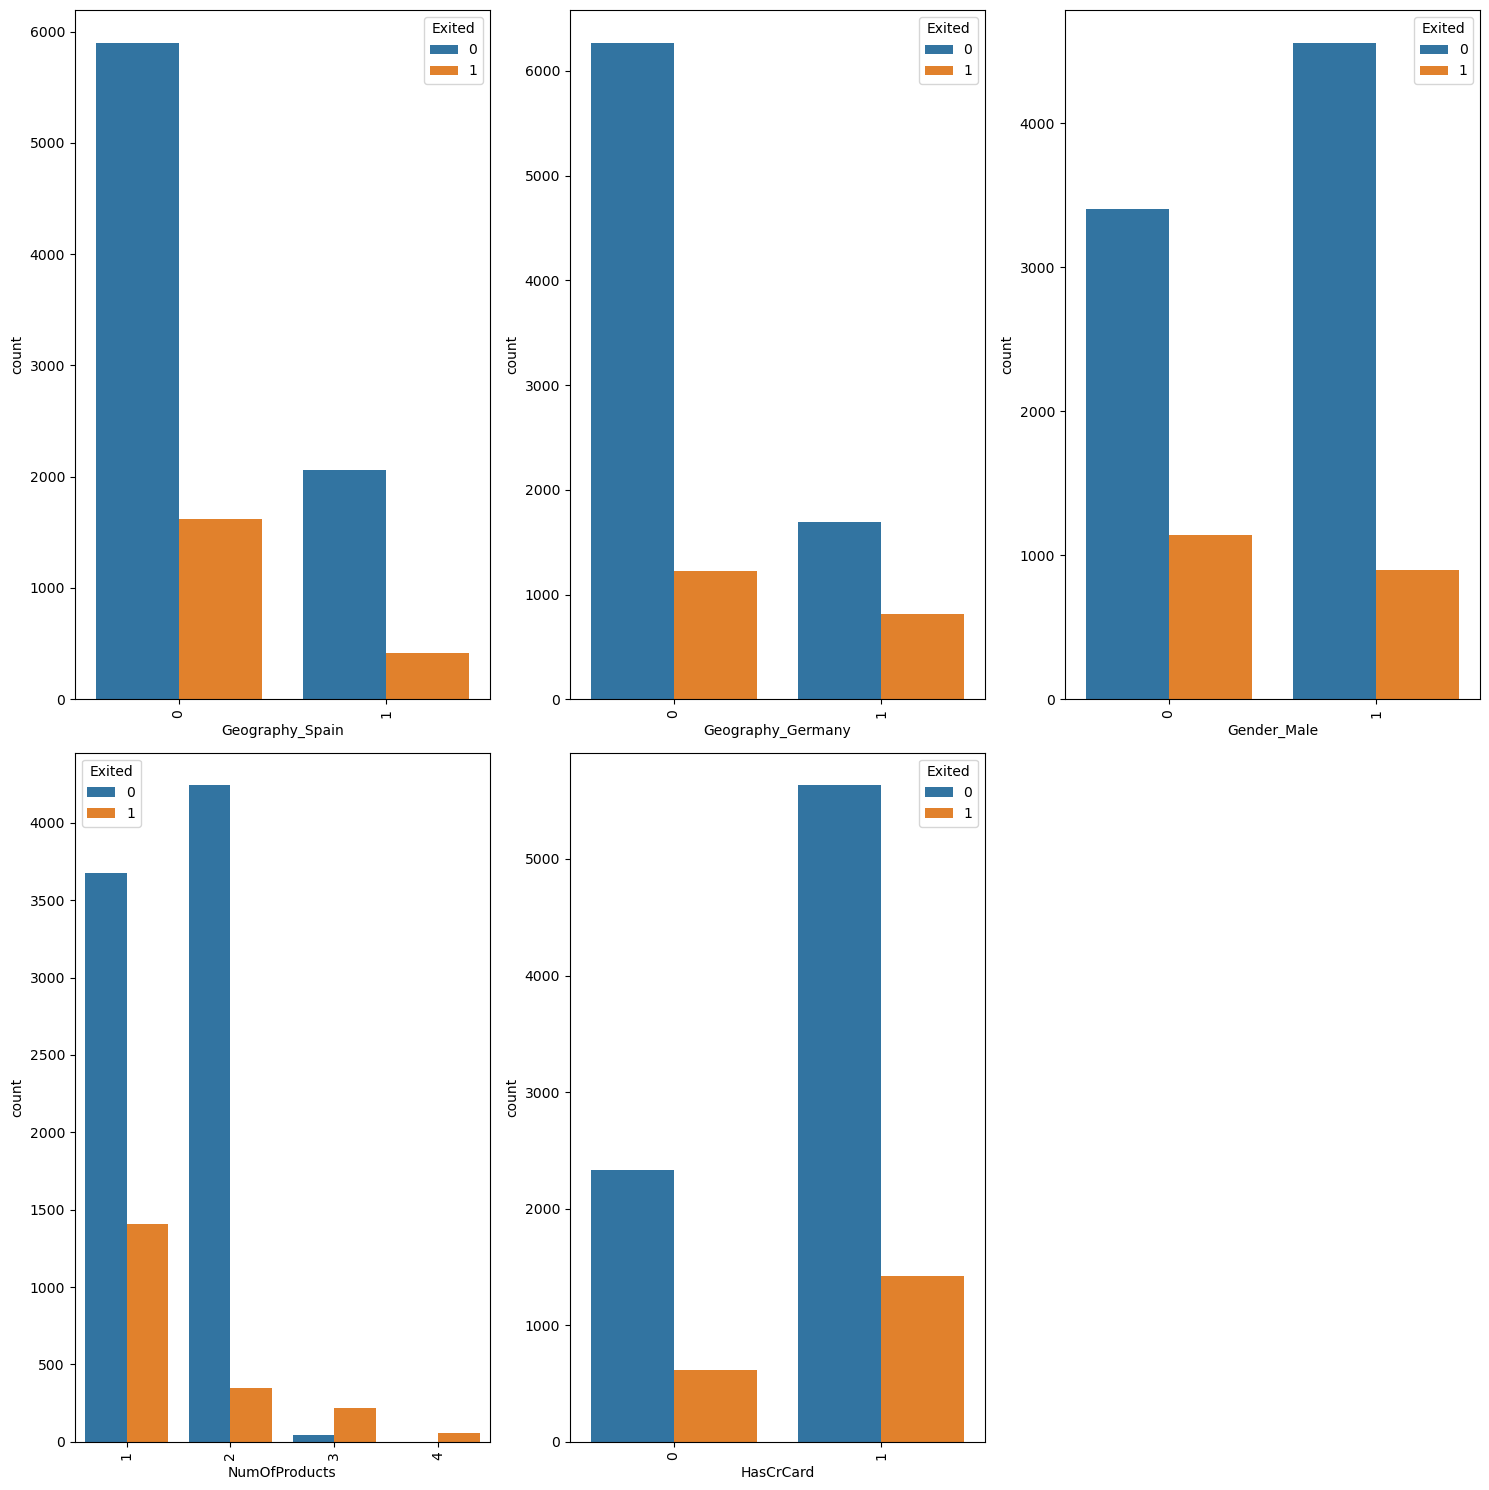

In [118]:
# list of categorical variables to plot
cat_vars = ['Geography_Spain', 'Geography_Germany', 'Gender_Male', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Exited', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

In [119]:
import seaborn as sns 

C:\Users\avija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

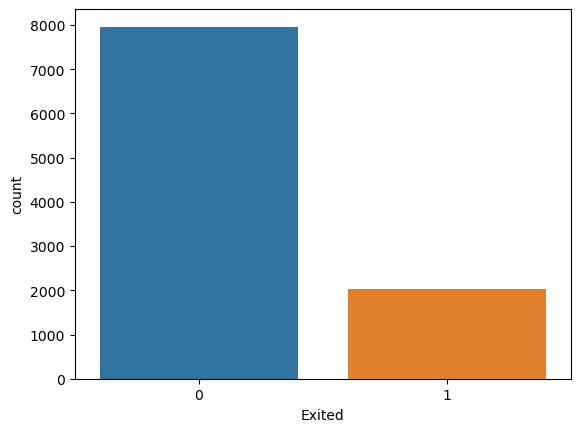

In [120]:
sns.countplot(data['Exited'])

In [121]:
x = data.drop('Exited', axis=1)
y = data['Exited']

# SMOTE - Synthetic Minority Oversampling Technique

In [122]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [123]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Encode categorical variables using one-hot encoding
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

# Oversample minority class using SMOTE
x_res, y_res = SMOTE().fit_resample(x_encoded, y)


In [124]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
sc = StandardScaler()

In [129]:
x_train = sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [130]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Logistic Regression

LR: typical threshold is 0.5

if threshold > 0.5 --> high precision and low recall 

if threshold < 0.5 --> low precision and high recall

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
log = LogisticRegression()

In [133]:
log.fit(x_train, y_train)

LogisticRegression()

In [134]:
y_pred1 = log.predict(x_test)

In [135]:
from sklearn. metrics import accuracy_score

In [136]:
accuracy_score(y_test, y_pred1)

0.811

In [137]:
from sklearn.metrics import precision_score, recall_score

In [138]:
precision_score(y_test, y_pred1)

0.5524475524475524

#########KNN

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn = KNeighborsClassifier()

In [141]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [142]:
y_pred2 = knn.predict(x_test)

C:\Users\avija\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [143]:
accuracy_score(y_test,y_pred2)


0.83

In [144]:
precision_score(y_test,y_pred2)

0.6108786610878661

#######Random Forest Classifier

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf= RandomForestClassifier()

In [147]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [148]:
y_pred3 = rf.predict(x_test)

In [149]:
accuracy_score(y_test,y_pred3)

0.865

In [150]:
precision_score(y_test,y_pred3)

0.7450199203187251

########GradientBoostingClassifier

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
gbc = GradientBoostingClassifier()

In [153]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [154]:
y_pred4 = gbc.predict(x_test)

In [155]:
accuracy_score(y_test,y_pred4)

0.8675

In [156]:
precision_score(y_test,y_pred4)


0.75

In [157]:
final_data = pd.DataFrame({'Models': ['LR', 'KNN', 'RF', 'GBC'],
                           'ACC': [accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4)],
                           "PRS":[precision_score(y_test,y_pred1),
                                precision_score(y_test,y_pred2),
                               precision_score(y_test,y_pred3),
                               precision_score(y_test,y_pred4)]})


In [158]:
final_data

,Models,ACC,PRS
0,LR,0.8110,0.552448
1,KNN,0.8300,0.610879
2,RF,0.8650,0.745020
3,GBC,0.8675,0.750000


In [159]:
import seaborn as sns

C:\Users\avija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

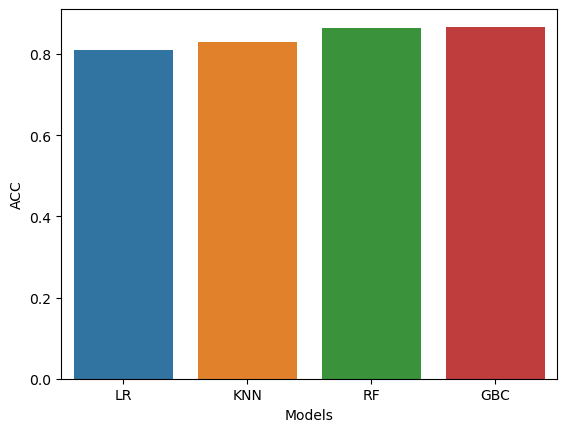

In [160]:
sns.barplot(final_data['Models'], final_data['ACC'])

C:\Users\avija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='PRS'>

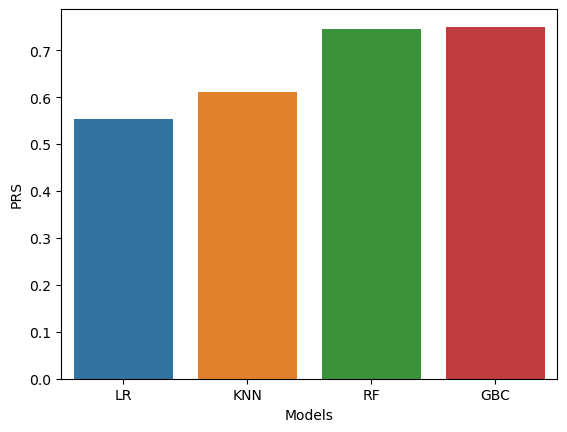

In [161]:
sns.barplot(final_data['Models'], final_data['PRS'])

# Save the best model - RF

In [162]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
x_res_scaled = scaler.fit_transform(x_res)


In [163]:
rf.fit(x_res, y_res)

RandomForestClassifier()

In [164]:
import joblib

In [165]:
joblib.dump (rf,'churn_predict_model')

['churn_predict_model']

In [166]:
model = joblib.load('churn_predict_model')

In [167]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [174]:
import joblib
model = joblib.load('churn_predict_model')


In [175]:
# Assuming you have the encoders and scalers from the training phase
x_input = [[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 1, 0, 0]]

# Perform the same preprocessing steps
x_input_encoded = encoder.transform(x_input)  # Apply one-hot encoding
x_input_scaled = scaler.transform(x_input_encoded)  # Apply scaling


C:\Users\avija\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [176]:
prediction = model.predict(x_input_scaled)
print(prediction)


[1]
